# <font style = "color:rgb(50,120,229)">Implementation of Morphological Operations</font>
We had discussed how to use dilation and erosion operations in the previous section. In this section, we will see what is going on under the hood. The most important concept that you need to understand is the Structuring element. We will discuss about the structuring element and how it is used for performing these morphological operations.

## <font style="color:rgb(50,120,229)">Implement Method 2</font>
1. Scan through the image and superimpose the kernel on the neighborhood of each pixel. 
1. Perform an AND operation of the neighborhood with the kernel.
1. Replace the pixel value with the `maximum` value in the neighborhood given by the kernel. 

This means that you check every pixel and its neighborhood with respect to the kernel and change the pixel to white if any of the pixel in this neighborhood is white. OpenCV implements an optimized version of this method. This will work even if the image is not a binary image.

## <font style="color:rgb(50,120,229)">Import Libraries </font>

In [86]:
import cv2
import numpy as np
from dataPath import DATA_PATH
import matplotlib.pyplot as plt
%matplotlib inline

In [87]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

# <font style="color:rgb(50,120,229)">Create a Demo Image</font>
## <font style="color:rgb(50,120,229)">Create an empty matrix </font>

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


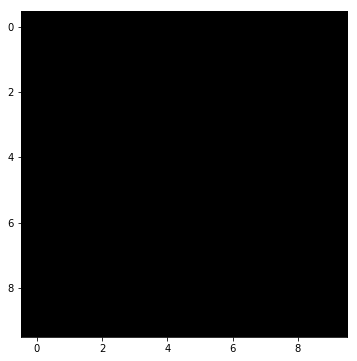

In [88]:
im = np.zeros((10,10),dtype='uint8')
print(im);
plt.imshow(im)

## <font style="color:rgb(50,120,229)">Lets add some white blobs</font>

We have added the blobs at different places so that all boundary cases are covered in this example.

[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]]


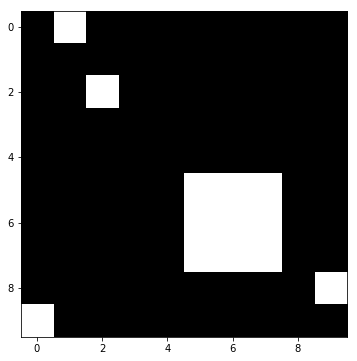

In [89]:
im[0,1] = 1
im[-1,0]= 1
im[-2,-1]=1
im[2,2] = 1
im[5:8,5:8] = 1

print(im)
plt.imshow(im)

This becomes our demo Image for illustration purpose

## <font style="color:rgb(50,120,229)">Create an Ellipse Structuring Element </font>
Let us create a 3x3 ellipse structuring element.

In [90]:
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
print(element)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


In [91]:
ksize = element.shape[0]

In [92]:
height,width = im.shape[:2]

## <font style="color:rgb(50,120,229)">First check the correct output using cv2.dilate</font>

[[1 1 1 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 0]
 [0 0 0 0 1 1 1 1 1 1]
 [1 0 0 0 0 1 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 1]]


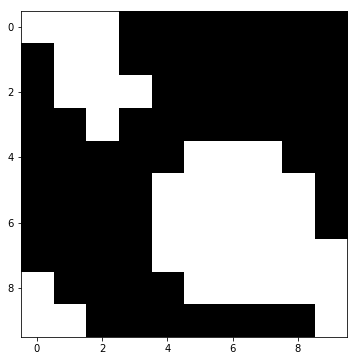

In [93]:
dilatedEllipseKernel = cv2.dilate(im, element)
print(dilatedEllipseKernel)
plt.imshow(dilatedEllipseKernel)

## <font style="color:rgb(50,120,229)">Write Code for Dilation from scratch</font>

Create a VideoWriter object and write the result obtained at the end of each iteration to the object. Save the video to **`dilationScratch.avi`** and display it using markdown below:

**`dilationScratch.avi` will come here**

```<video width="320" height="240" controls>
  <source src="dilationScratch.avi" type="video/mp4">
</video>```

**Note**

1. Use FPS as 10 and frame size as 50x50
2. Before writing the frame, resize it to 50x50
3. Convert the resized frame to BGR
4. Release the object

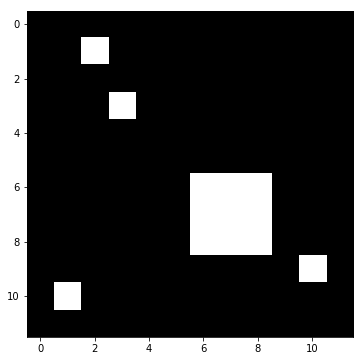

1
1
[[0 0 0]
 [0 0 1]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


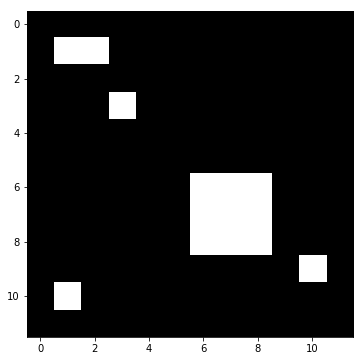

2
[[0 0 0]
 [0 1 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


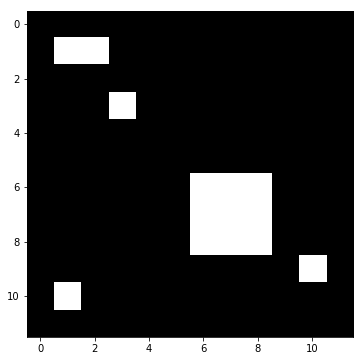

3
[[0 0 0]
 [1 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


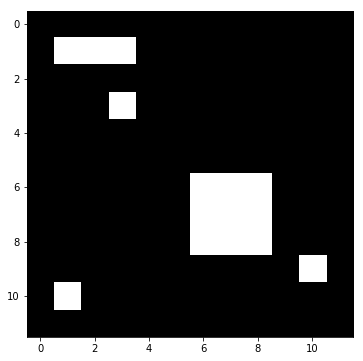

4
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


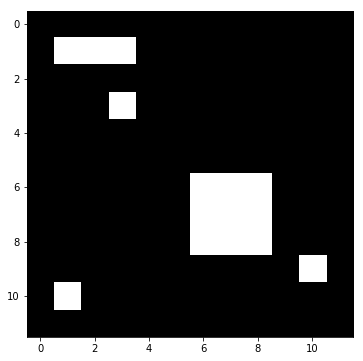

5
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


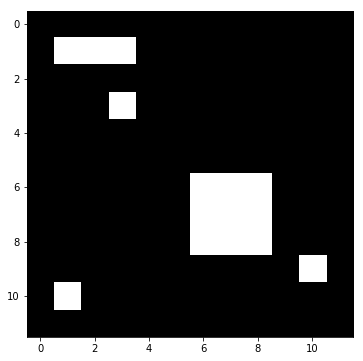

6
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


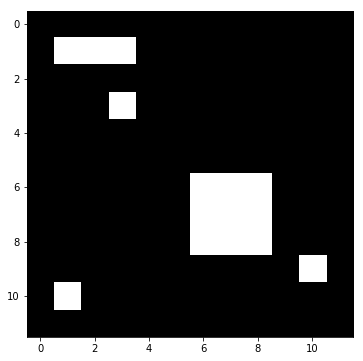

7
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


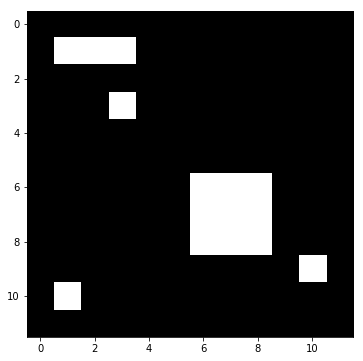

8
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


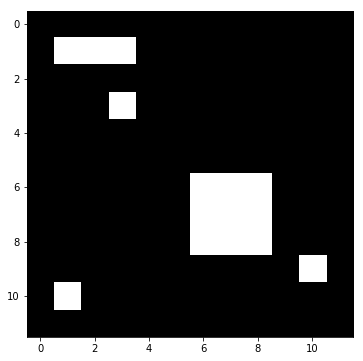

9
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


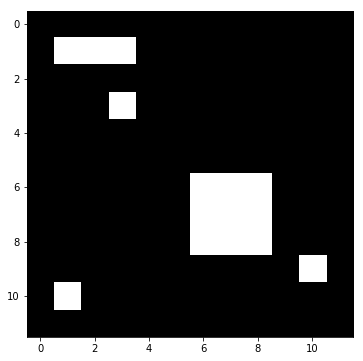

10
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


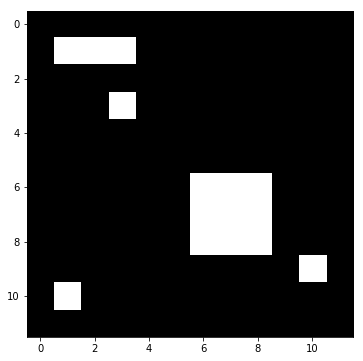

2
1
[[0 0 1]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


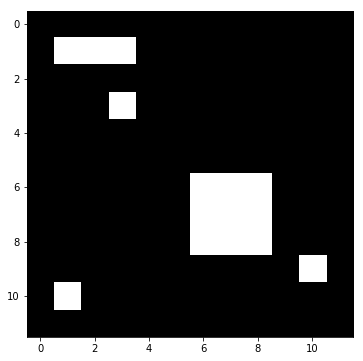

2
[[0 1 0]
 [0 0 0]
 [0 0 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


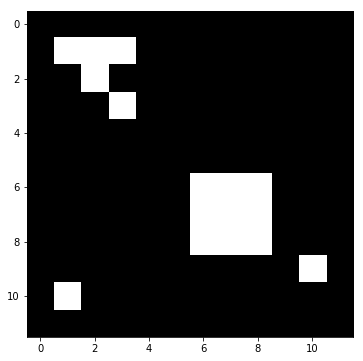

3
[[1 0 0]
 [0 0 0]
 [0 1 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


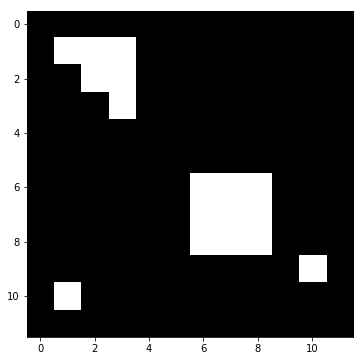

4
[[0 0 0]
 [0 0 0]
 [1 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


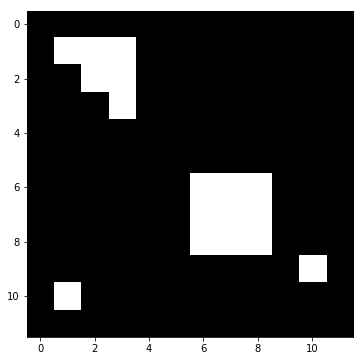

5
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


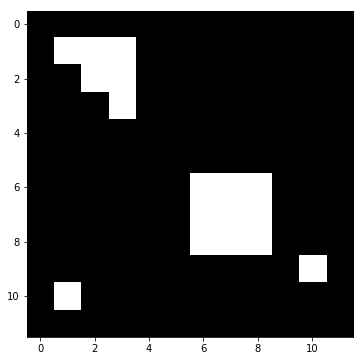

6
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


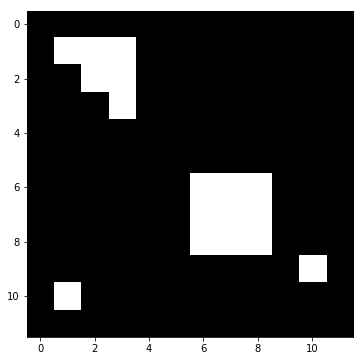

7
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


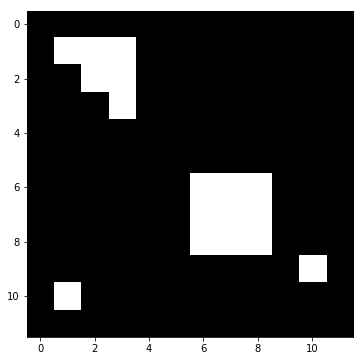

8
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


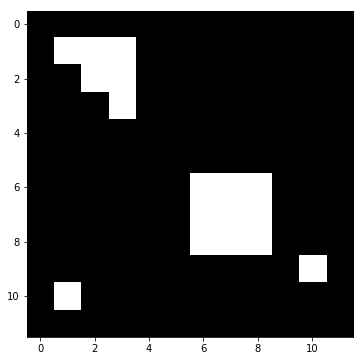

9
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


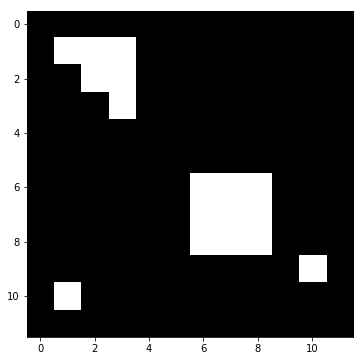

10
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


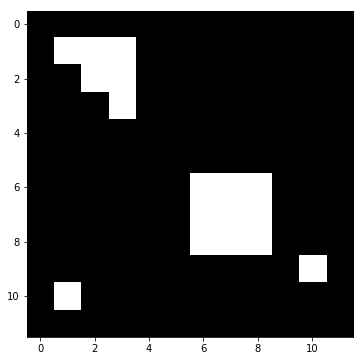

3
1
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


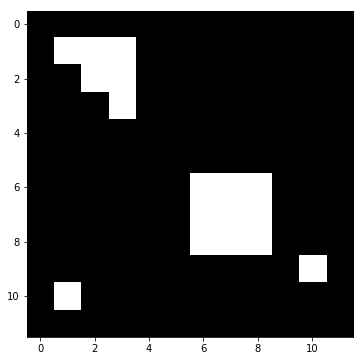

2
[[0 0 0]
 [0 0 1]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


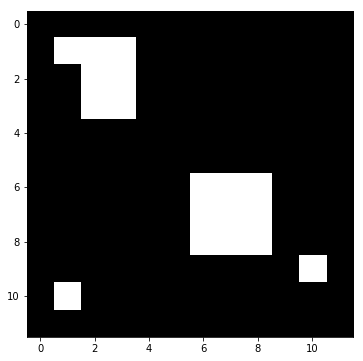

3
[[0 0 0]
 [0 1 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


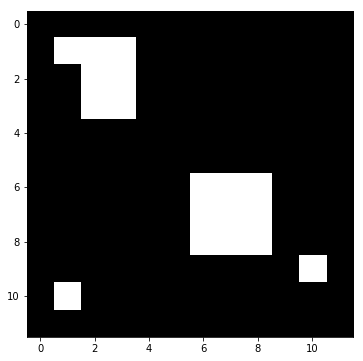

4
[[0 0 0]
 [1 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


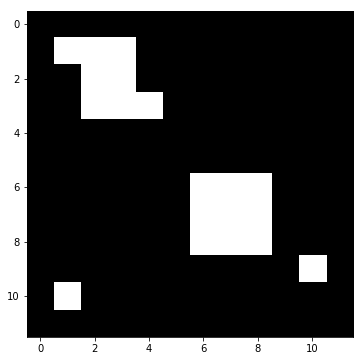

5
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


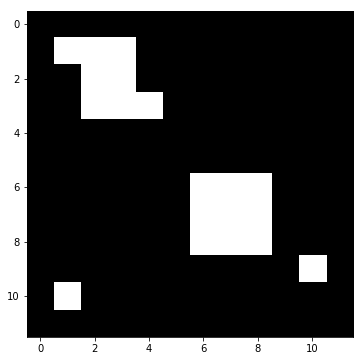

6
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


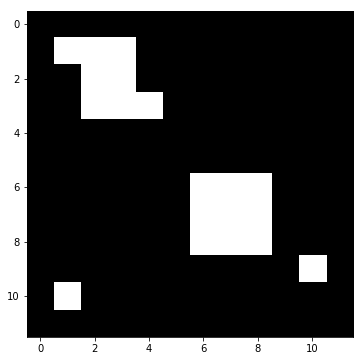

7
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


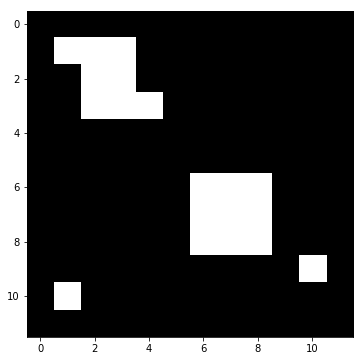

8
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


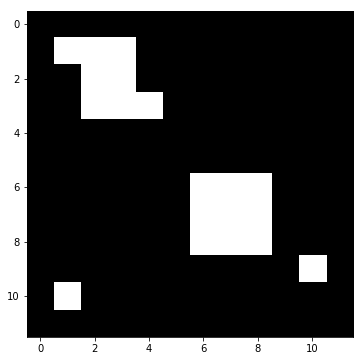

9
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


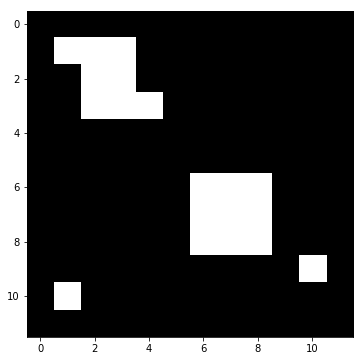

10
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


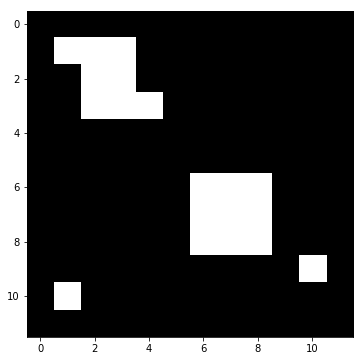

4
1
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


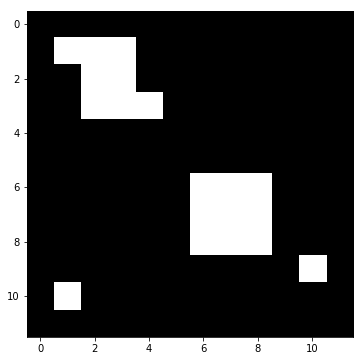

2
[[0 0 1]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


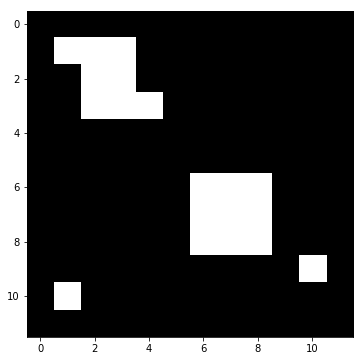

3
[[0 1 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


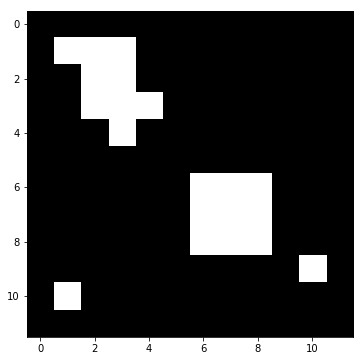

4
[[1 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


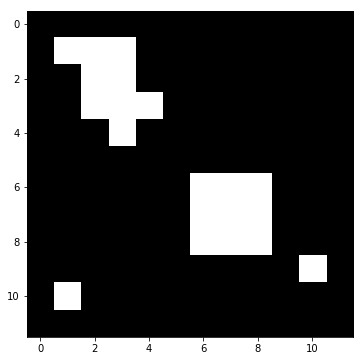

5
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


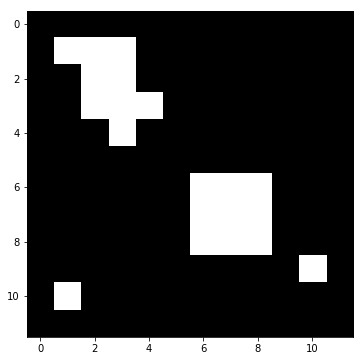

6
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


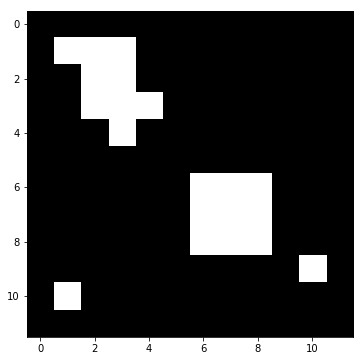

7
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


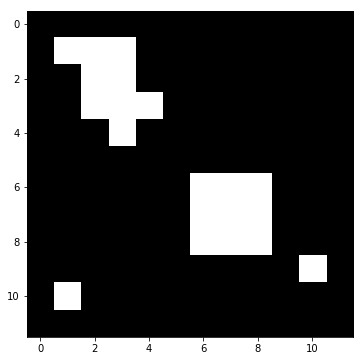

8
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


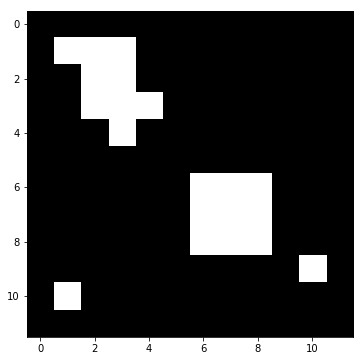

9
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


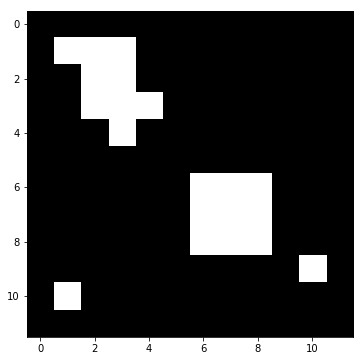

10
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


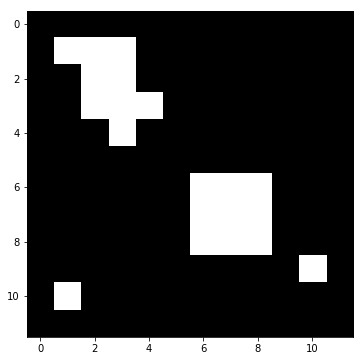

5
1
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


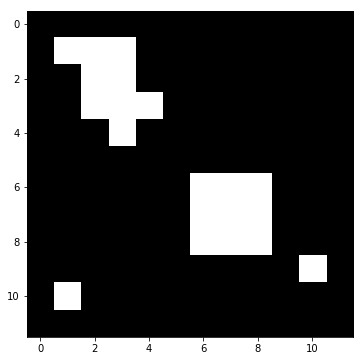

2
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


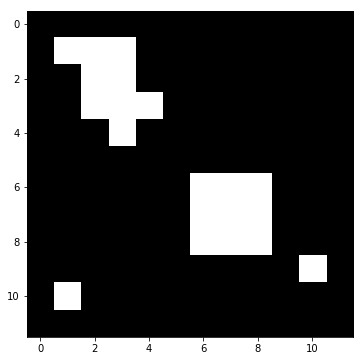

3
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


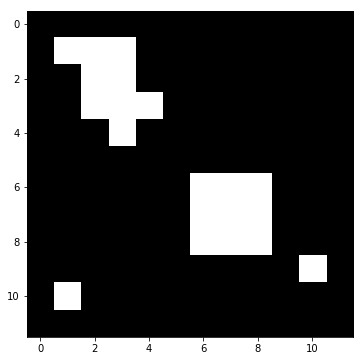

4
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


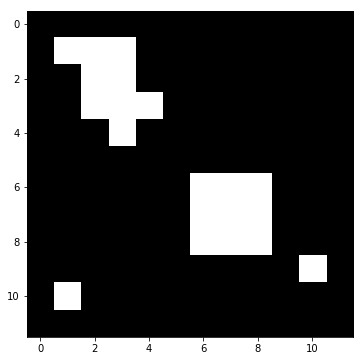

5
[[0 0 0]
 [0 0 0]
 [0 0 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


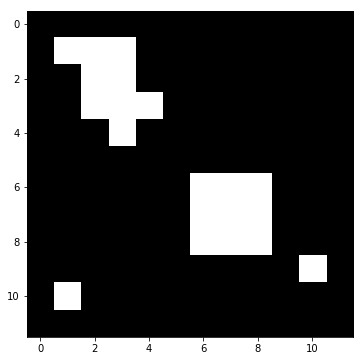

6
[[0 0 0]
 [0 0 0]
 [0 1 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


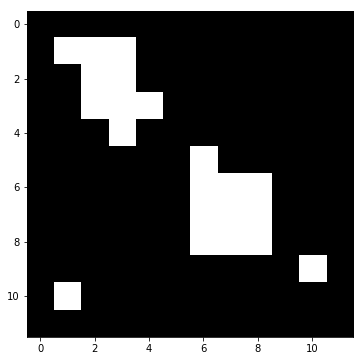

7
[[0 0 0]
 [0 0 0]
 [1 1 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


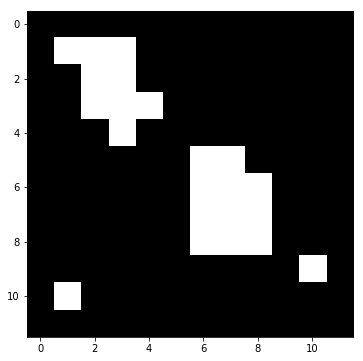

8
[[0 0 0]
 [0 0 0]
 [1 1 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


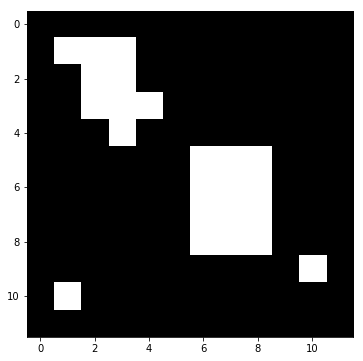

9
[[0 0 0]
 [0 0 0]
 [1 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


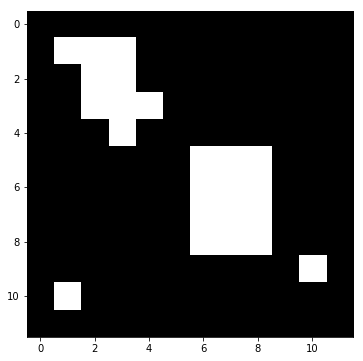

10
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


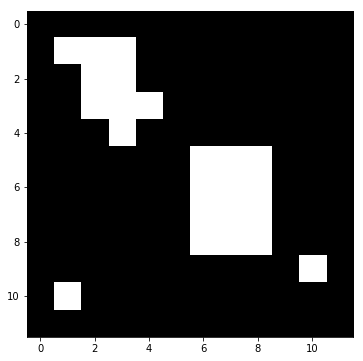

6
1
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


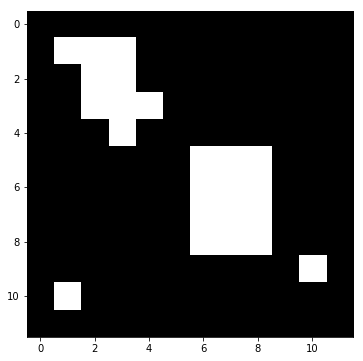

2
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


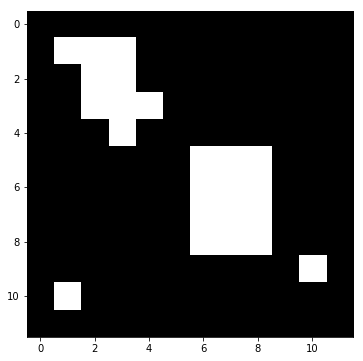

3
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


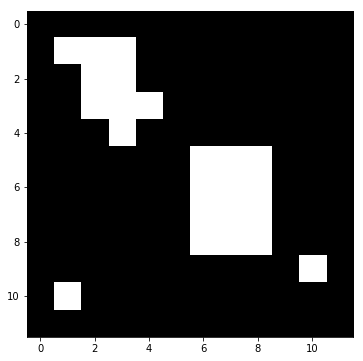

4
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


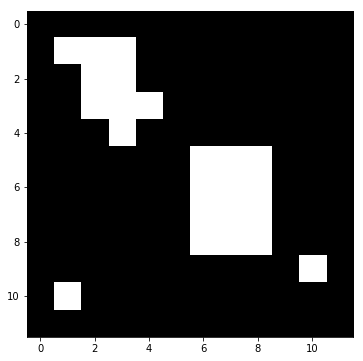

5
[[0 0 0]
 [0 0 1]
 [0 0 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


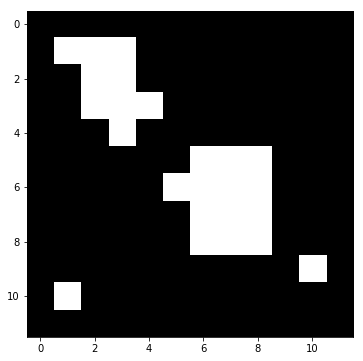

6
[[0 0 0]
 [0 1 1]
 [0 1 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


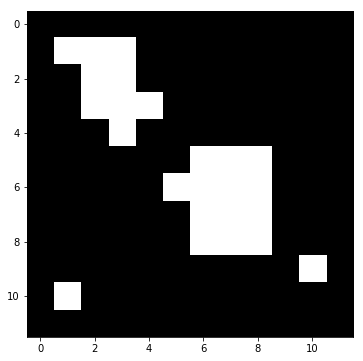

7
[[0 0 0]
 [1 1 1]
 [1 1 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


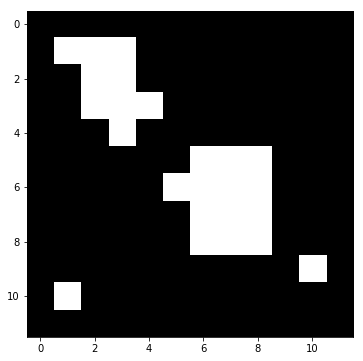

8
[[0 0 0]
 [1 1 0]
 [1 1 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


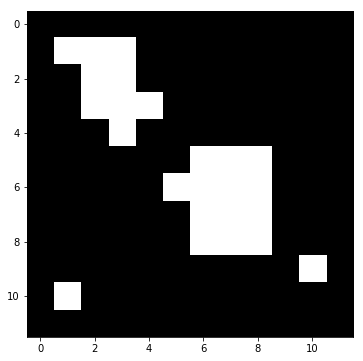

9
[[0 0 0]
 [1 0 0]
 [1 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


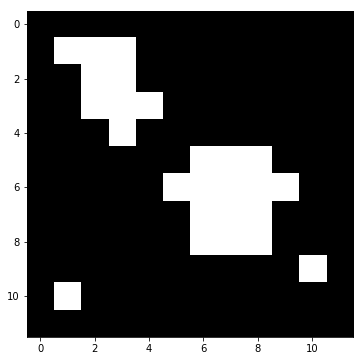

10
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


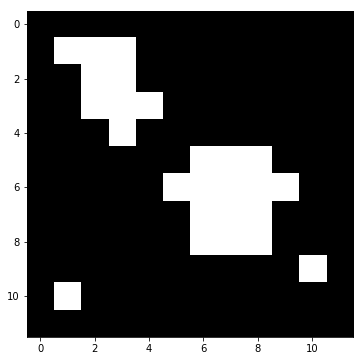

7
1
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


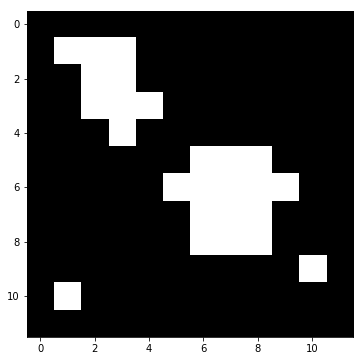

2
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


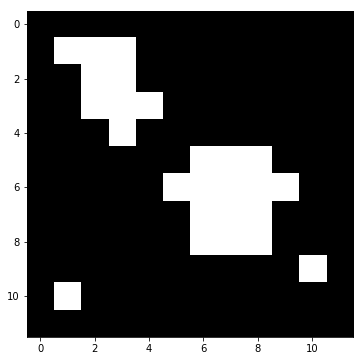

3
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


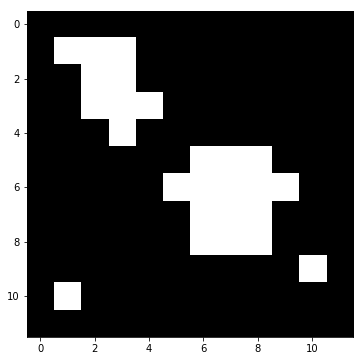

4
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


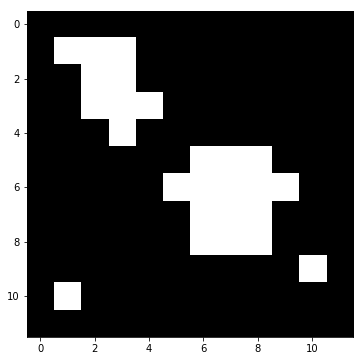

5
[[0 0 1]
 [0 0 1]
 [0 0 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


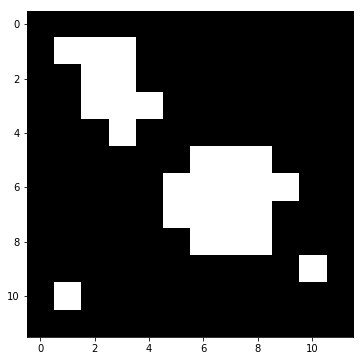

6
[[0 1 1]
 [0 1 1]
 [0 1 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


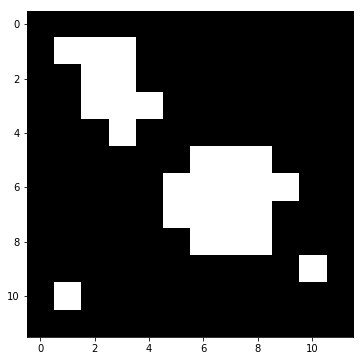

7
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


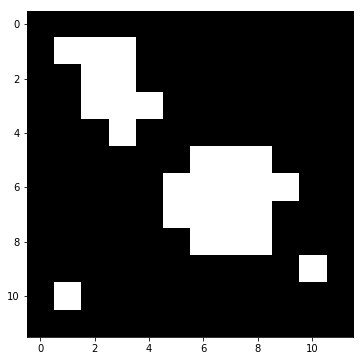

8
[[1 1 0]
 [1 1 0]
 [1 1 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


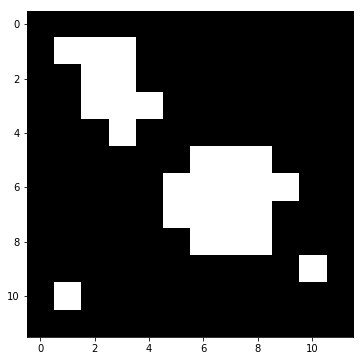

9
[[1 0 0]
 [1 0 0]
 [1 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


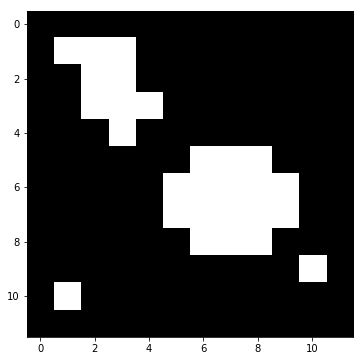

10
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


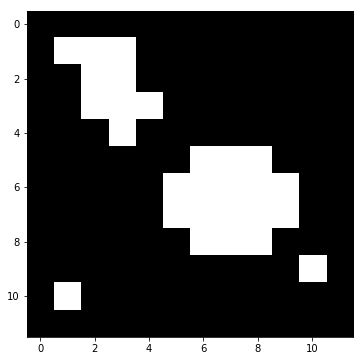

8
1
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


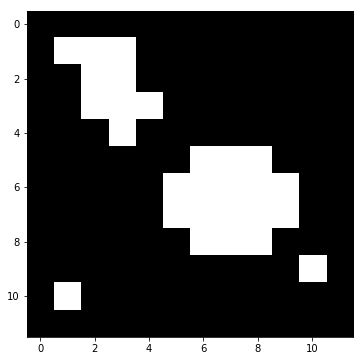

2
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


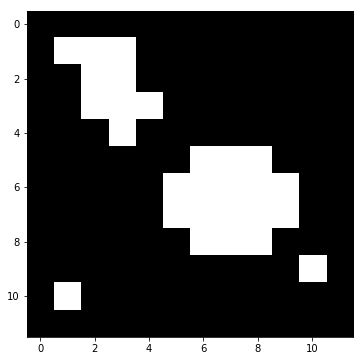

3
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


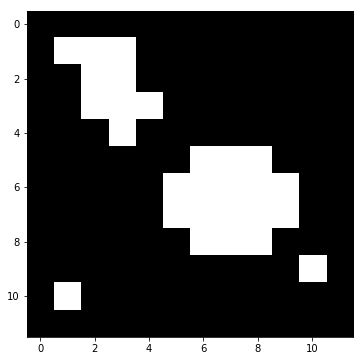

4
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


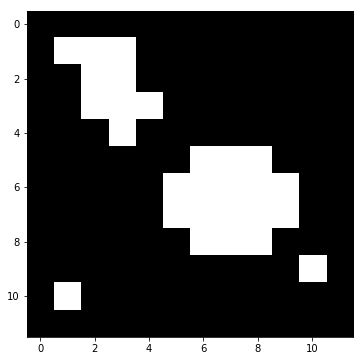

5
[[0 0 1]
 [0 0 1]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


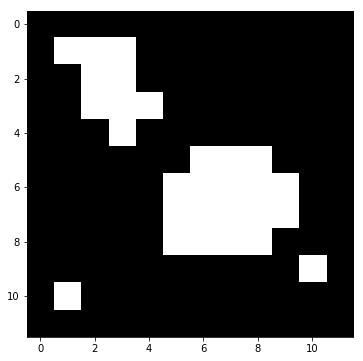

6
[[0 1 1]
 [0 1 1]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


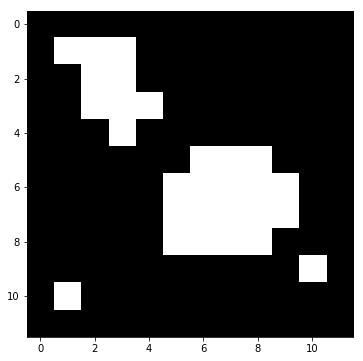

7
[[1 1 1]
 [1 1 1]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


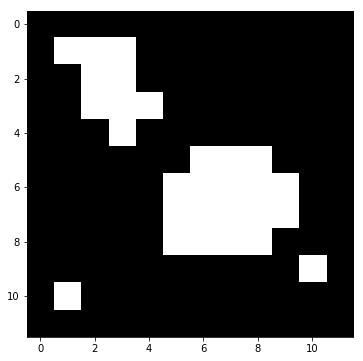

8
[[1 1 0]
 [1 1 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


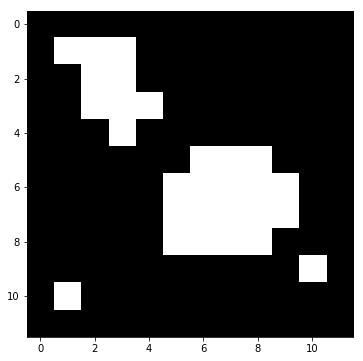

9
[[1 0 0]
 [1 0 0]
 [0 0 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


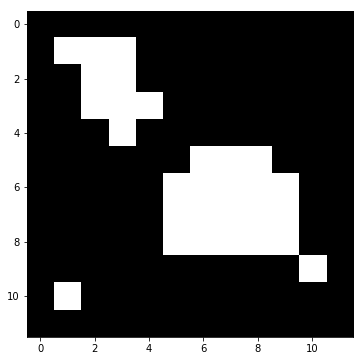

10
[[0 0 0]
 [0 0 0]
 [0 1 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


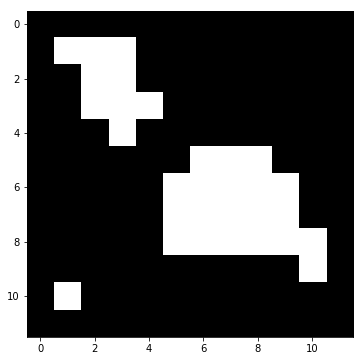

9
1
[[0 0 0]
 [0 0 0]
 [0 1 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


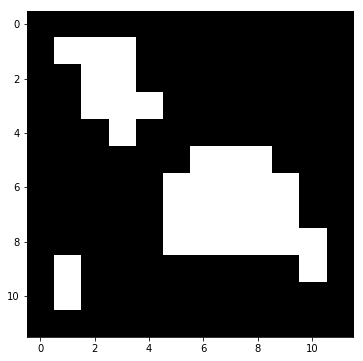

2
[[0 0 0]
 [0 0 0]
 [1 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


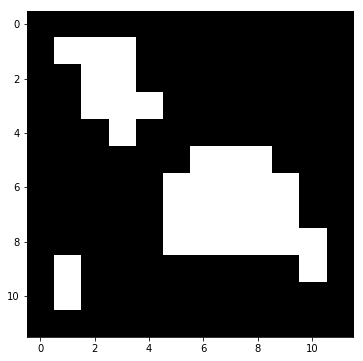

3
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


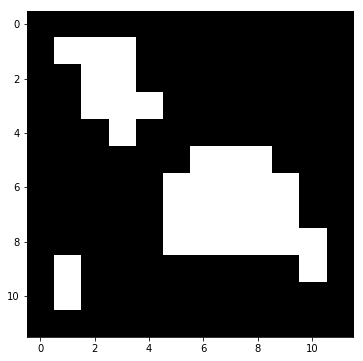

4
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


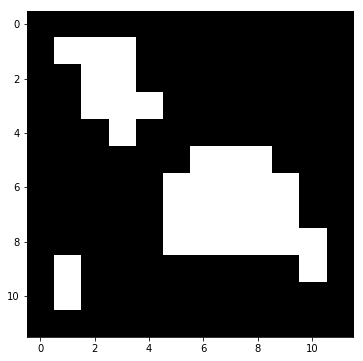

5
[[0 0 1]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


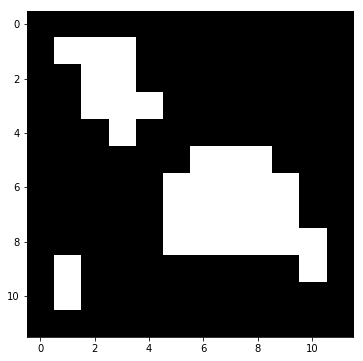

6
[[0 1 1]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 1 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


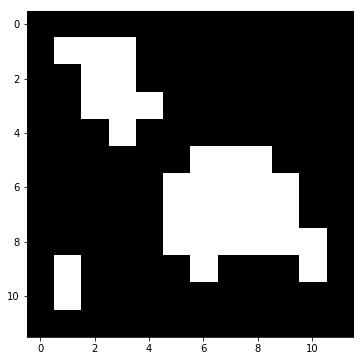

7
[[1 1 1]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 1 1 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


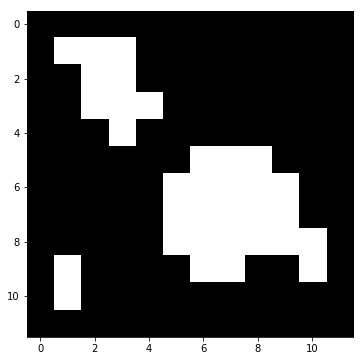

8
[[1 1 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 1 1 1 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


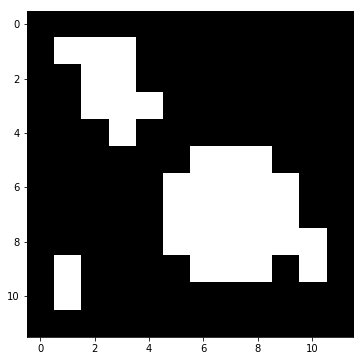

9
[[1 0 0]
 [0 0 1]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 1 1 1 1 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


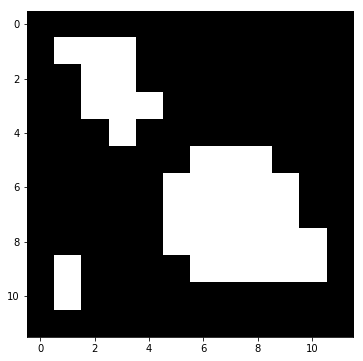

10
[[0 0 0]
 [0 1 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 1 1 1 1 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


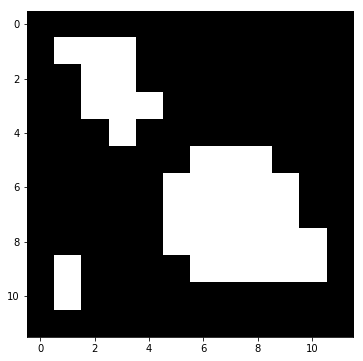

10
1
[[0 0 0]
 [0 1 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 1 1 1 1 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


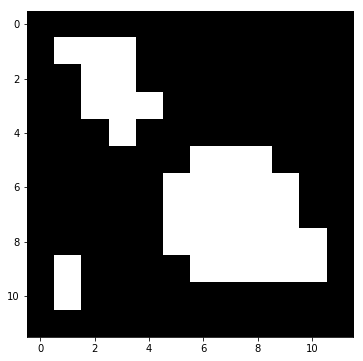

2
[[0 0 0]
 [1 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 1 1 1 1 1 0]
 [0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


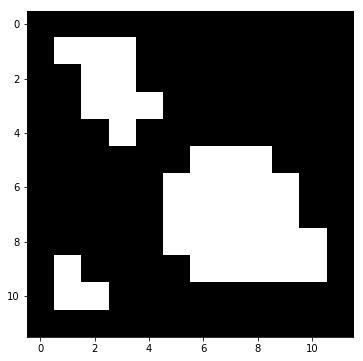

3
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 1 1 1 1 1 0]
 [0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


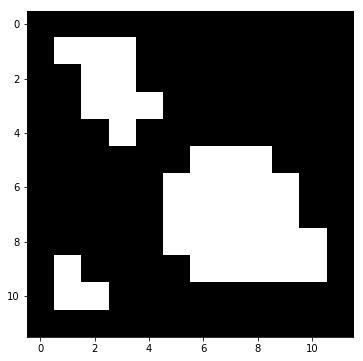

4
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 1 1 1 1 1 0]
 [0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


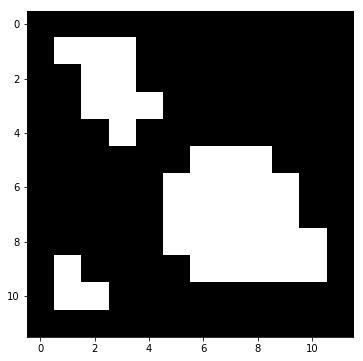

5
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 1 1 1 1 1 0]
 [0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


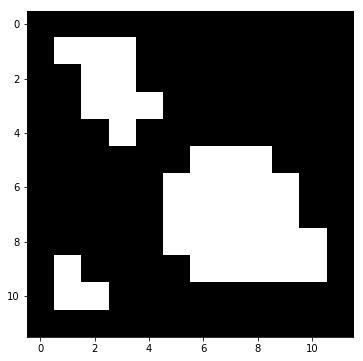

6
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 1 1 1 1 1 0]
 [0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


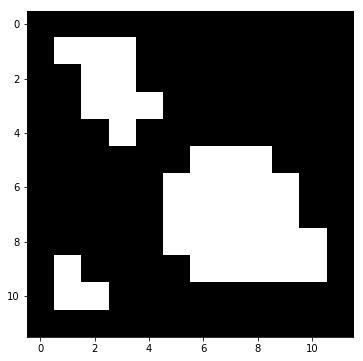

7
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 1 1 1 1 1 0]
 [0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


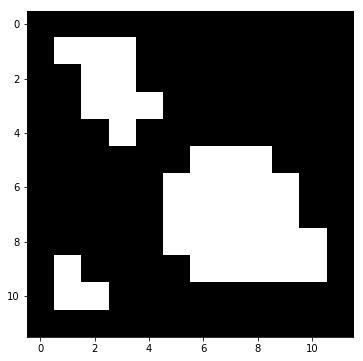

8
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 1 1 1 1 1 0]
 [0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


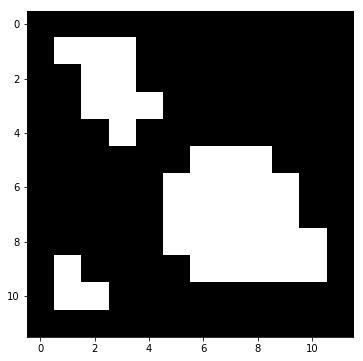

9
[[0 0 1]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 1 1 1 1 1 0]
 [0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


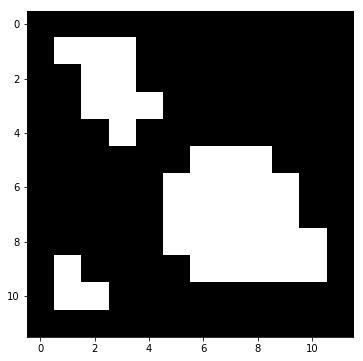

10
[[0 1 0]
 [0 0 0]
 [0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 1 1 1 1 1 1 0]
 [0 1 0 0 0 0 1 1 1 1 1 0]
 [0 1 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


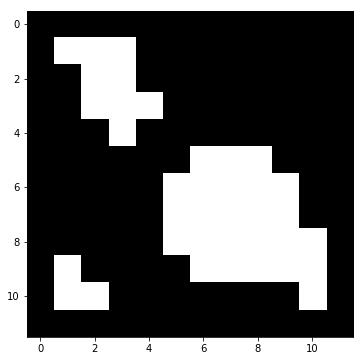

In [94]:
border = ksize//2
paddedIm = np.zeros((height + border*2, width + border*2))
paddedIm = cv2.copyMakeBorder(im, border, border, border, border, cv2.BORDER_CONSTANT, value = 0)
paddedDilatedIm = paddedIm.copy()

# Create a VideoWriter object
# Use frame size as 50x50
out = cv2.VideoWriter('dilationScratch.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (50,50))

#print(element)
#print(paddedIm)
plt.imshow(paddedIm);plt.show()
for h_i in range(border, height+border):
    print(h_i)
    for w_i in range(border,width+border):
        print(w_i)
        print(paddedIm[h_i-1 : h_i+2, w_i-1 : w_i+2])
        resultIm = cv2.bitwise_and(paddedIm[h_i-1 : h_i+2, w_i-1 : w_i+2], element)
        #print(resultIm)  
        maxCol = np.amax(resultIm[:,1])
        maxRow = np.amax(resultIm[1,:])
        maxResult = max(maxRow, maxCol)
        #print(maxCol)
        #print(maxRow)
        #print(maxResult)
        #print(paddedIm)
        #print("middle " + str(h_i-1 + 2) + "," + str(w_i-1 + 2) + "=" + str(paddedIm[h_i-1+2, w_i-1+2]))
        paddedDilatedIm[h_i, w_i] = maxResult
        resizedIm = cv2.resize(paddedDilatedIm[border:border+height,border:border+width], (50, 50), interpolation = cv2.INTER_AREA)
        resizedImBGR = cv2.cvtColor(resizedIm*255, cv2.COLOR_GRAY2BGR)
        out.write(resizedImBGR)
        print(paddedDilatedIm)
        plt.imshow(paddedDilatedIm);plt.show()


# Release the VideoWriter object
out.release()


In [95]:
%%HTML
<video width="320" height="240" controls>
  <source src="dilationScratch.avi" type="video/mp4">
</video>

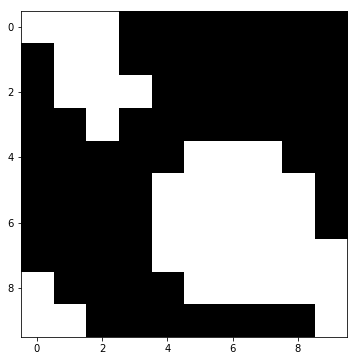

In [96]:
# Display final image (cropped)
dilatedImage = paddedDilatedIm[border:border+height,border:border+width]
plt.imshow(dilatedImage)


# <font style="color:rgb(50,120,229)">Implement Erosion </font>

## <font style="color:rgb(50,120,229)">Check the correct output using cv2.erode </font>

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


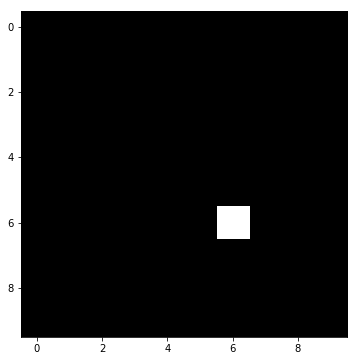

In [97]:
ErodedEllipseKernel = cv2.erode(im, element)
print(ErodedEllipseKernel)
plt.imshow(ErodedEllipseKernel);

## <font style="color:rgb(50,120,229)">Write code for Erosion from scratch</font>

Create a VideoWriter object and write the result obtained at the end of each iteration to the object. Save the video to **`erosionScratch.avi`** and display it using markdown below:

**`erosionScratch.avi` will come here**

```<video width="320" height="240" controls>
  <source src="erosionScratch.avi" type="video/mp4">
</video>```

**Note**

1. Use FPS as 10 and frame size as 50x50
2. Before writing the frame, resize it to 50x50
3. Convert the resized frame to BGR
4. Release the object

[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]
1
1
[[1 1 1]
 [1 0 1]
 [1 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


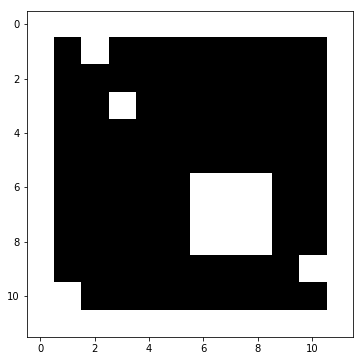

2
[[1 1 1]
 [0 1 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


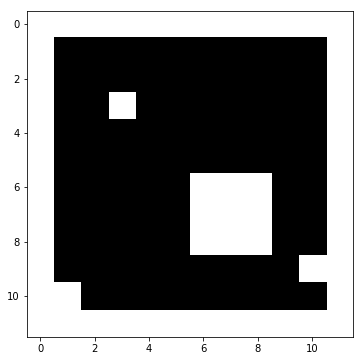

3
[[1 1 1]
 [1 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


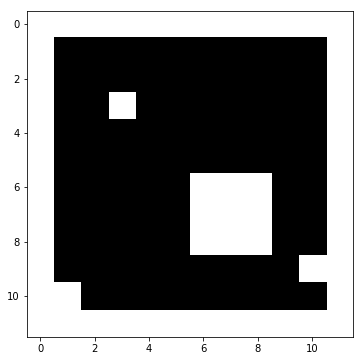

4
[[1 1 1]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


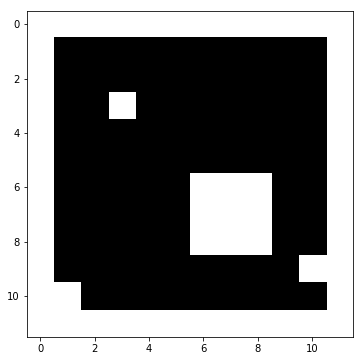

5
[[1 1 1]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


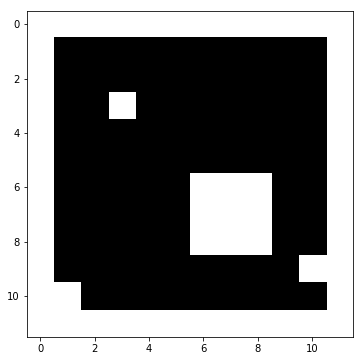

6
[[1 1 1]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


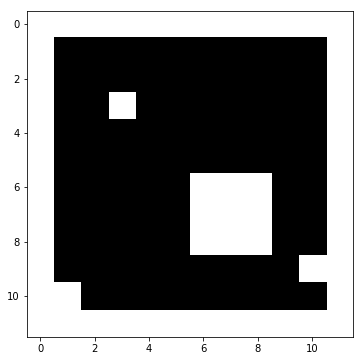

7
[[1 1 1]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


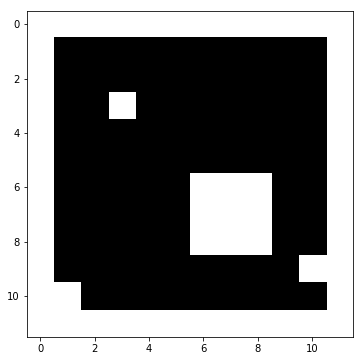

8
[[1 1 1]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


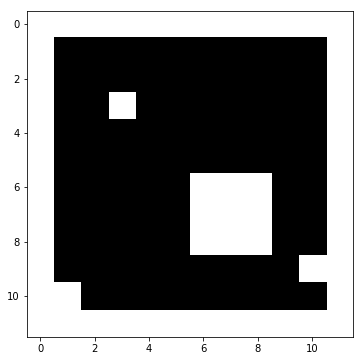

9
[[1 1 1]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


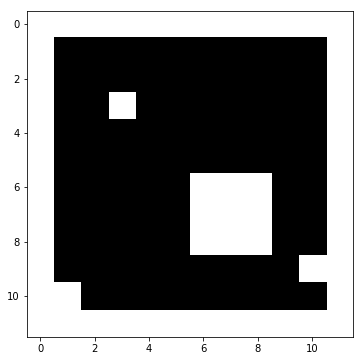

10
[[1 1 1]
 [0 0 1]
 [0 0 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


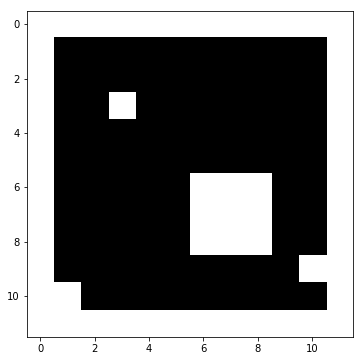

2
1
[[1 0 1]
 [1 0 0]
 [1 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


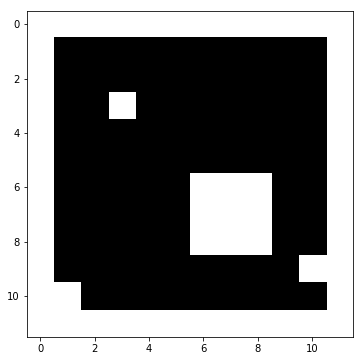

2
[[0 1 0]
 [0 0 0]
 [0 0 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


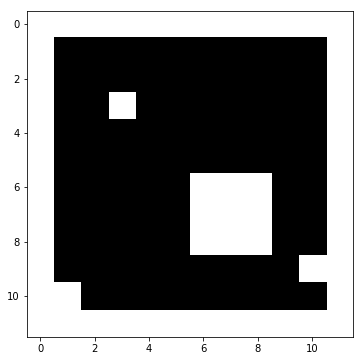

3
[[1 0 0]
 [0 0 0]
 [0 1 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


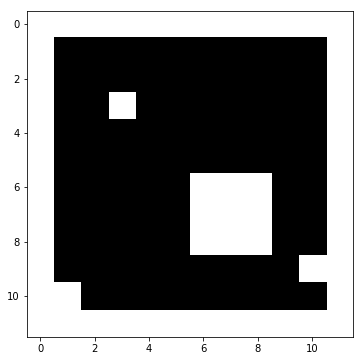

4
[[0 0 0]
 [0 0 0]
 [1 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


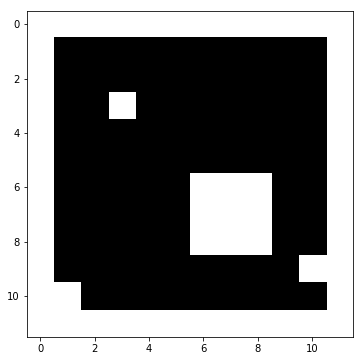

5
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


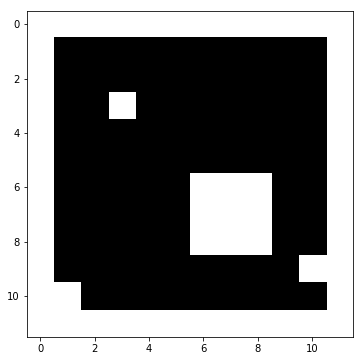

6
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


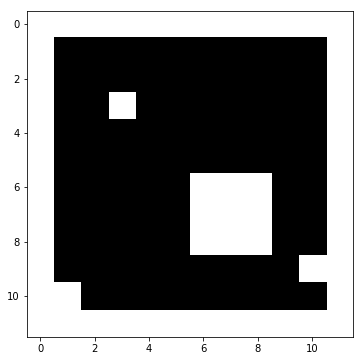

7
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


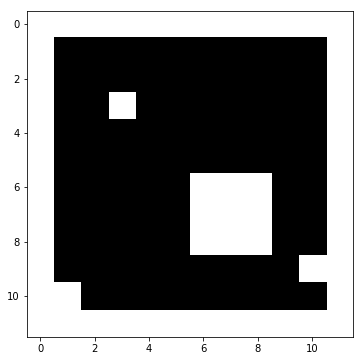

8
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


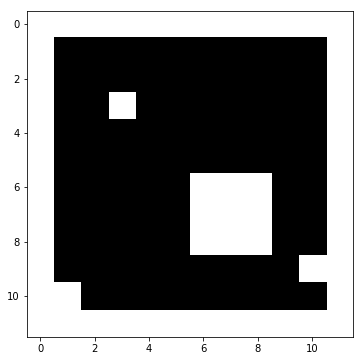

9
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


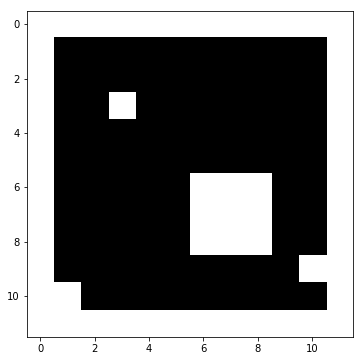

10
[[0 0 1]
 [0 0 1]
 [0 0 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


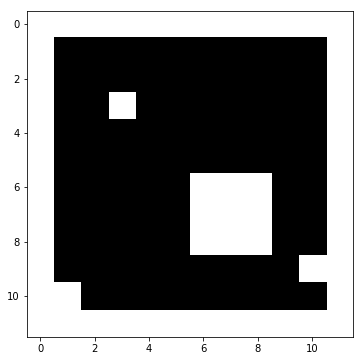

3
1
[[1 0 0]
 [1 0 0]
 [1 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


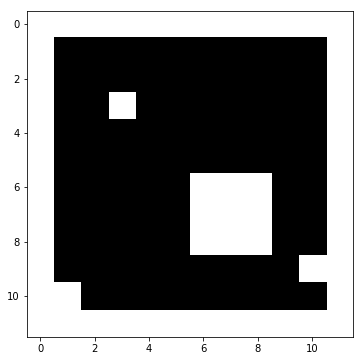

2
[[0 0 0]
 [0 0 1]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


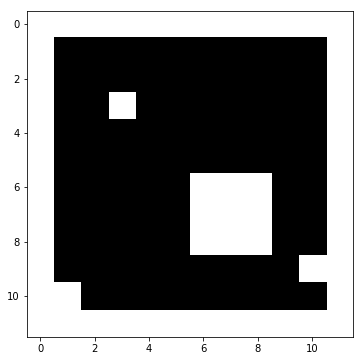

3
[[0 0 0]
 [0 1 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


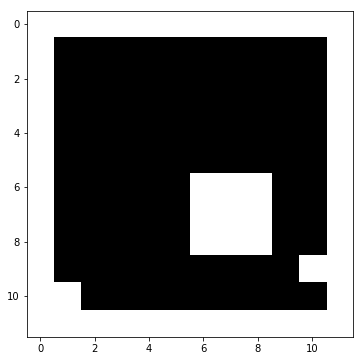

4
[[0 0 0]
 [1 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


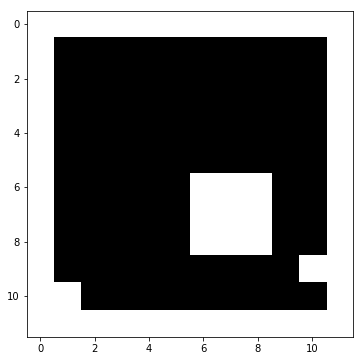

5
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


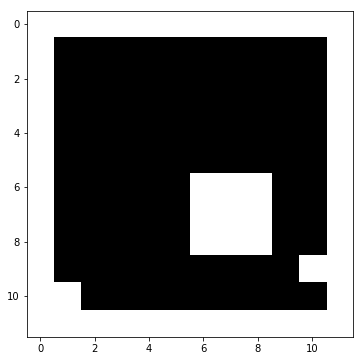

6
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


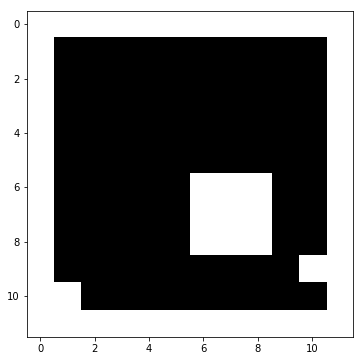

7
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


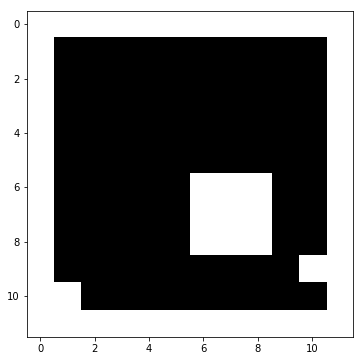

8
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


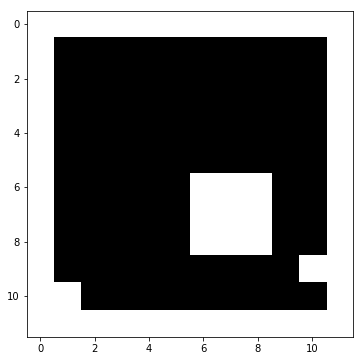

9
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


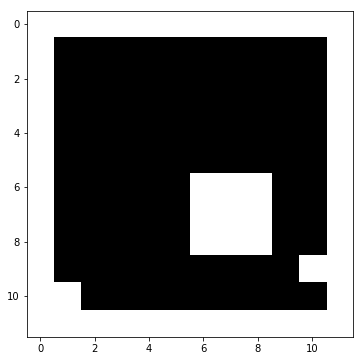

10
[[0 0 1]
 [0 0 1]
 [0 0 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


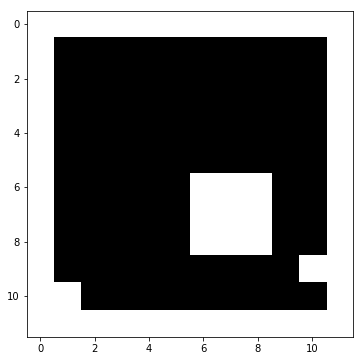

4
1
[[1 0 0]
 [1 0 0]
 [1 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


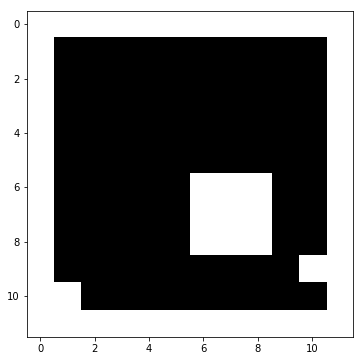

2
[[0 0 1]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


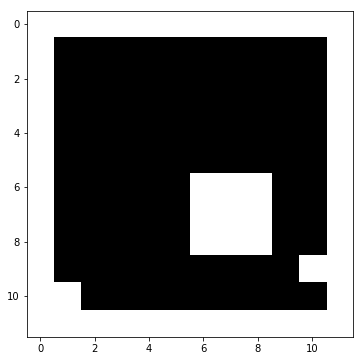

3
[[0 1 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


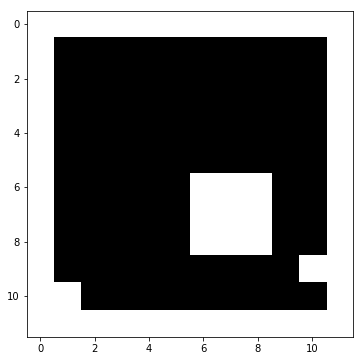

4
[[1 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


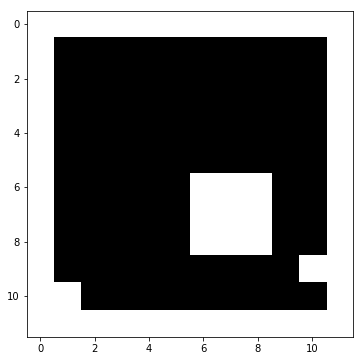

5
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


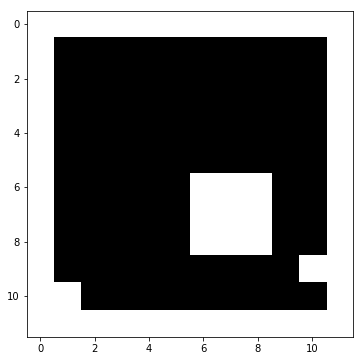

6
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


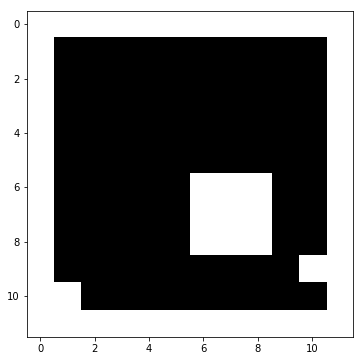

7
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


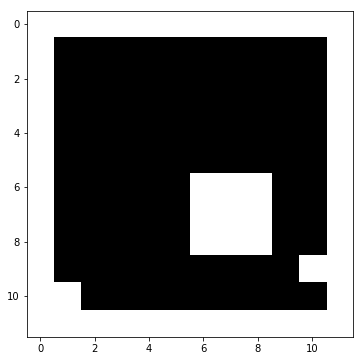

8
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


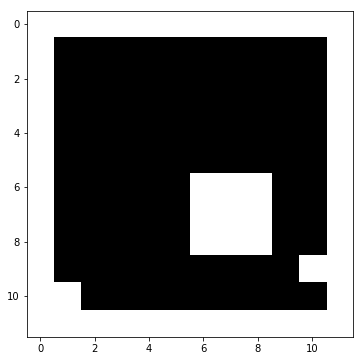

9
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


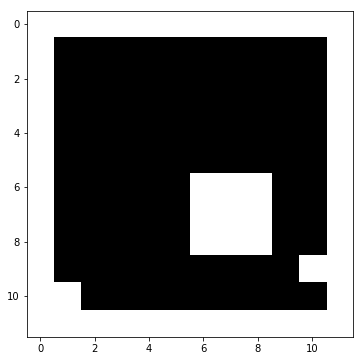

10
[[0 0 1]
 [0 0 1]
 [0 0 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


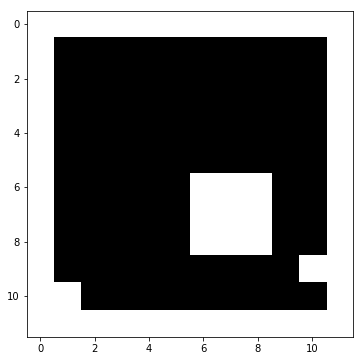

5
1
[[1 0 0]
 [1 0 0]
 [1 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


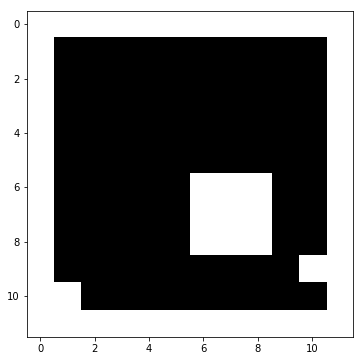

2
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


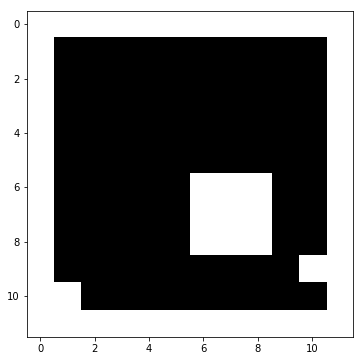

3
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


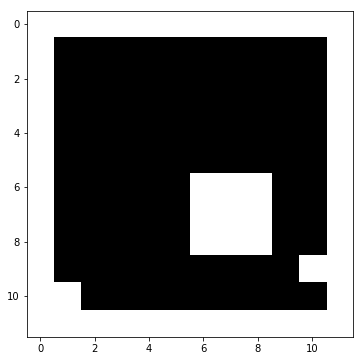

4
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


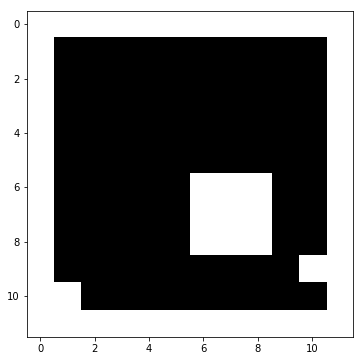

5
[[0 0 0]
 [0 0 0]
 [0 0 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


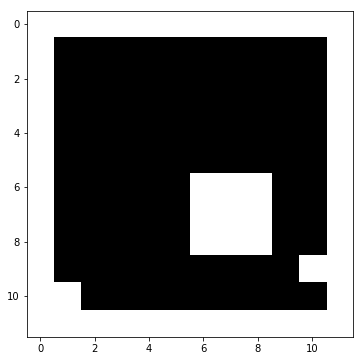

6
[[0 0 0]
 [0 0 0]
 [0 1 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


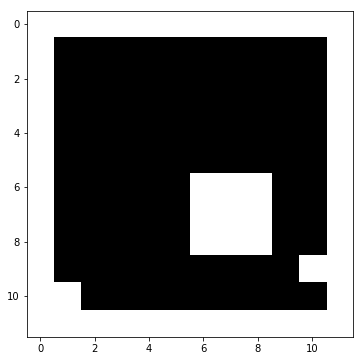

7
[[0 0 0]
 [0 0 0]
 [1 1 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


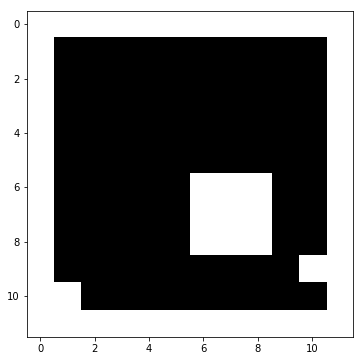

8
[[0 0 0]
 [0 0 0]
 [1 1 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


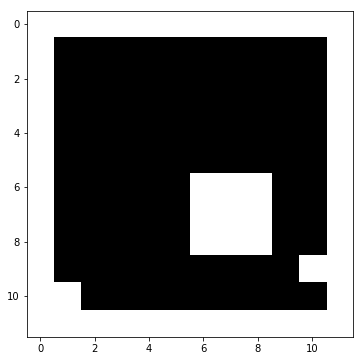

9
[[0 0 0]
 [0 0 0]
 [1 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


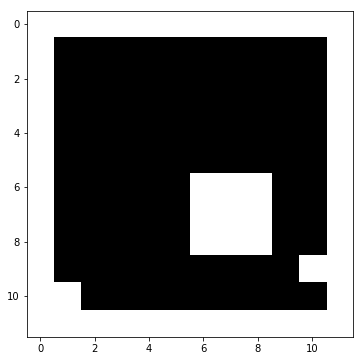

10
[[0 0 1]
 [0 0 1]
 [0 0 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


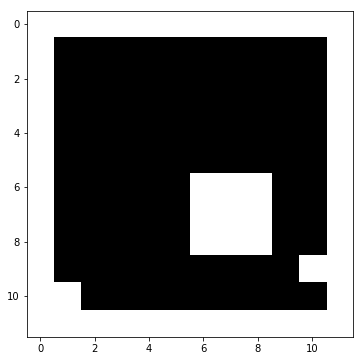

6
1
[[1 0 0]
 [1 0 0]
 [1 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


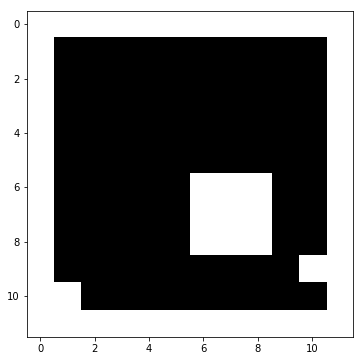

2
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


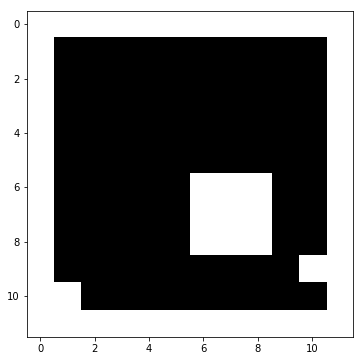

3
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


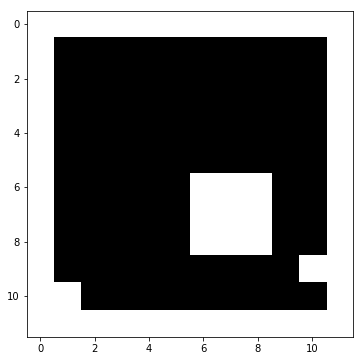

4
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


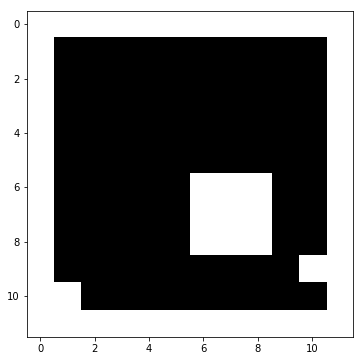

5
[[0 0 0]
 [0 0 1]
 [0 0 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


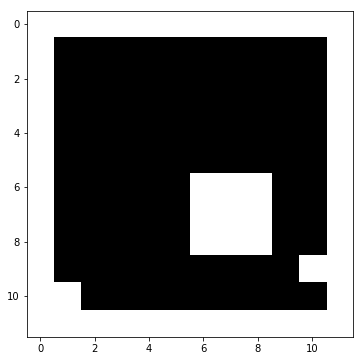

6
[[0 0 0]
 [0 1 1]
 [0 1 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


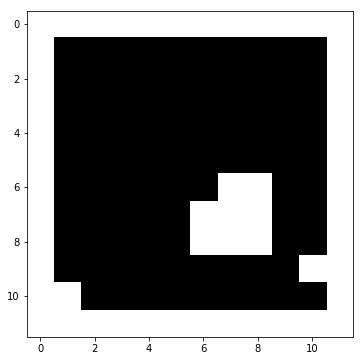

7
[[0 0 0]
 [1 1 1]
 [1 1 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


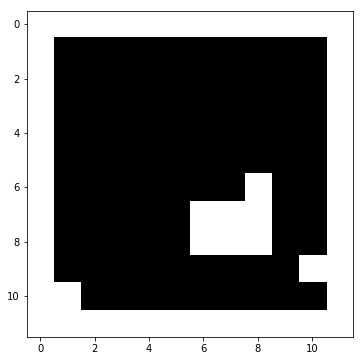

8
[[0 0 0]
 [1 1 0]
 [1 1 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


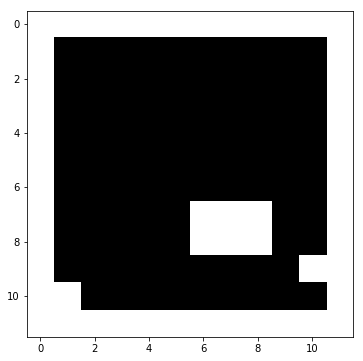

9
[[0 0 0]
 [1 0 0]
 [1 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


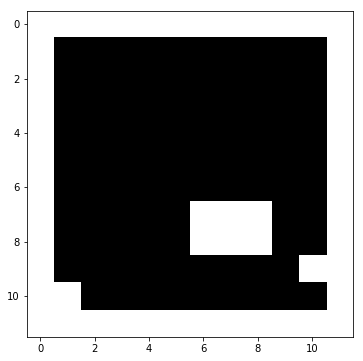

10
[[0 0 1]
 [0 0 1]
 [0 0 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


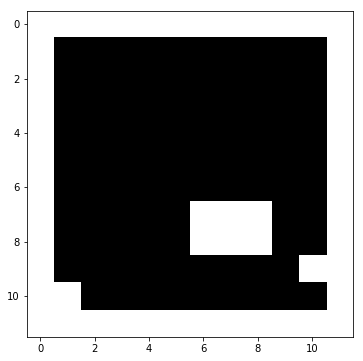

7
1
[[1 0 0]
 [1 0 0]
 [1 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


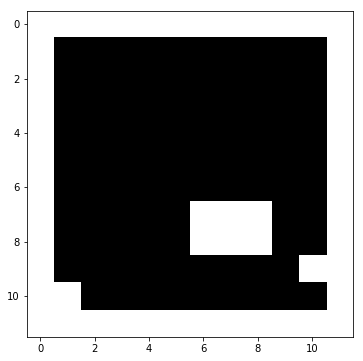

2
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


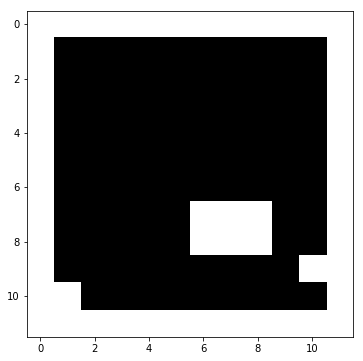

3
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


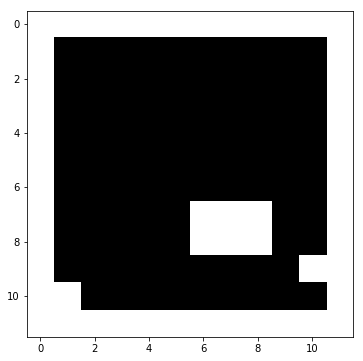

4
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


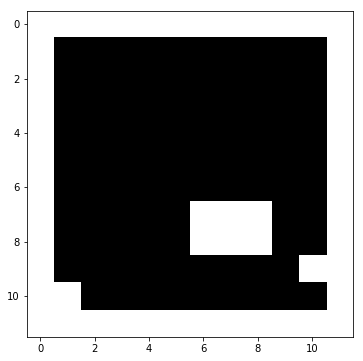

5
[[0 0 1]
 [0 0 1]
 [0 0 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


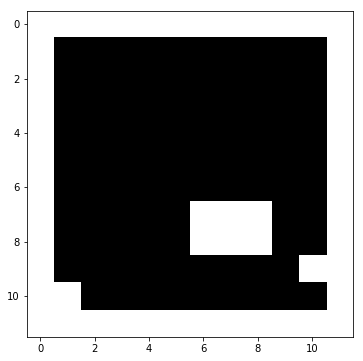

6
[[0 1 1]
 [0 1 1]
 [0 1 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


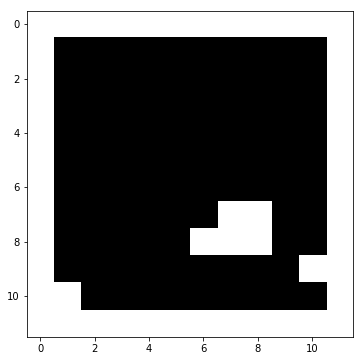

7
[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 1 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


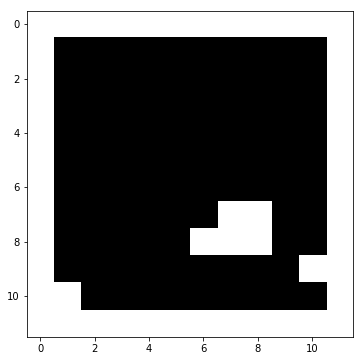

8
[[1 1 0]
 [1 1 0]
 [1 1 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


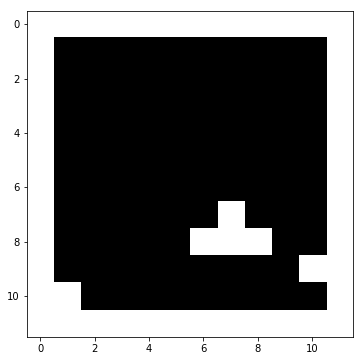

9
[[1 0 0]
 [1 0 0]
 [1 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


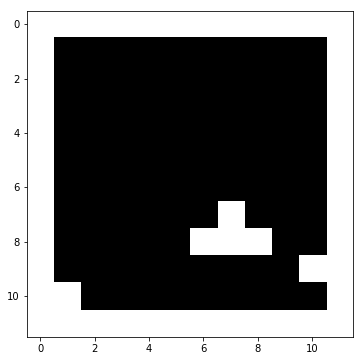

10
[[0 0 1]
 [0 0 1]
 [0 0 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


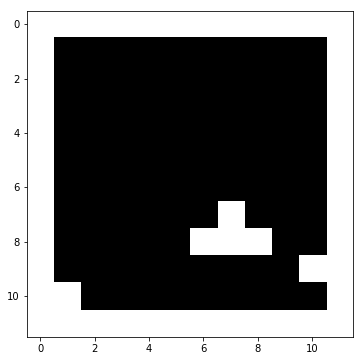

8
1
[[1 0 0]
 [1 0 0]
 [1 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


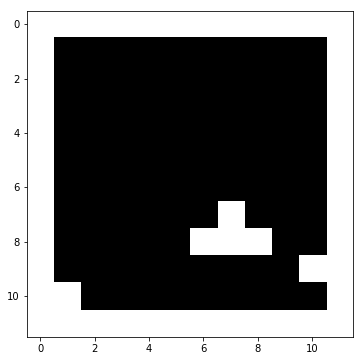

2
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


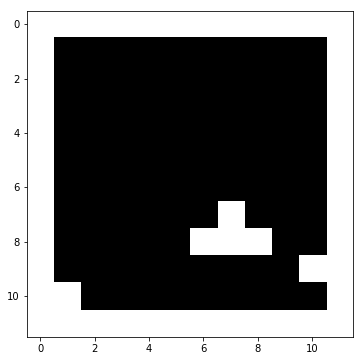

3
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


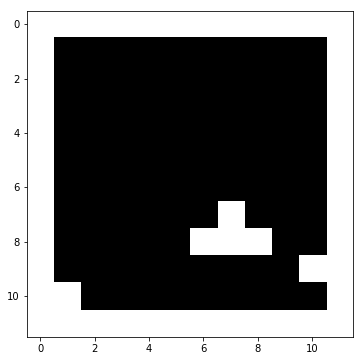

4
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


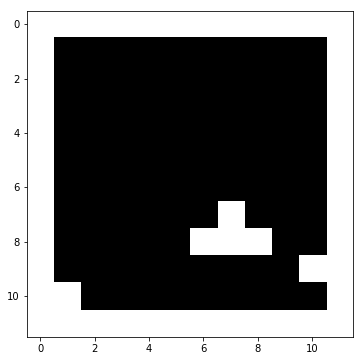

5
[[0 0 1]
 [0 0 1]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 1 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


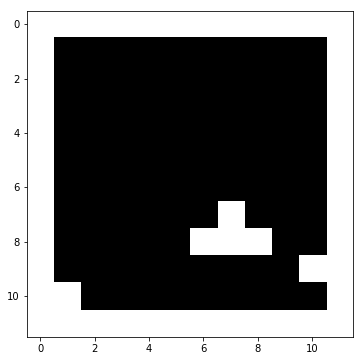

6
[[0 1 1]
 [0 1 1]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 1 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


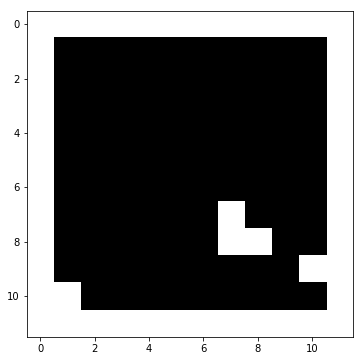

7
[[1 1 1]
 [1 1 1]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 1 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


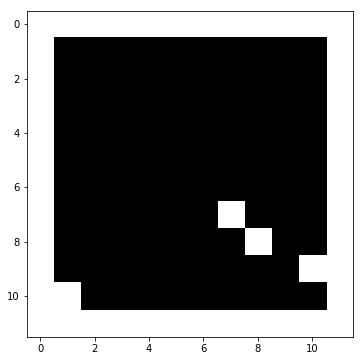

8
[[1 1 0]
 [1 1 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


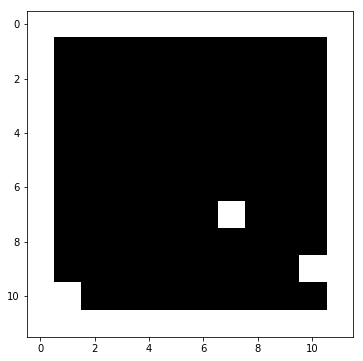

9
[[1 0 0]
 [1 0 0]
 [0 0 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


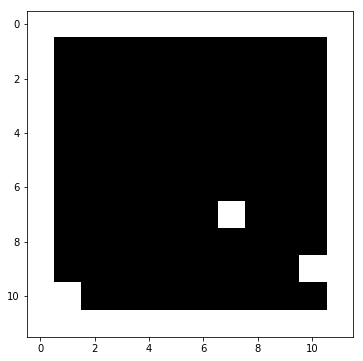

10
[[0 0 1]
 [0 0 1]
 [0 1 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


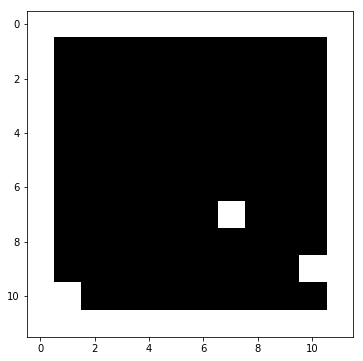

9
1
[[1 0 0]
 [1 0 0]
 [1 1 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


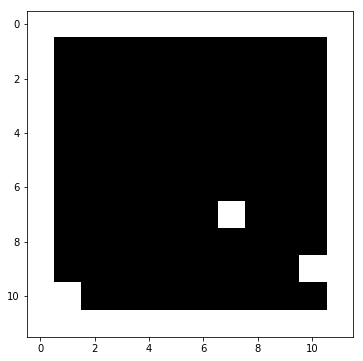

2
[[0 0 0]
 [0 0 0]
 [1 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


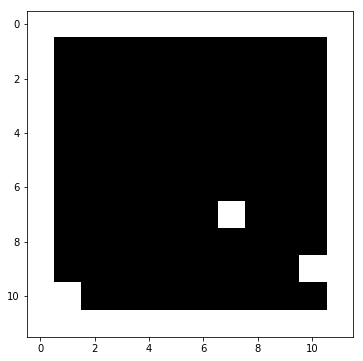

3
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


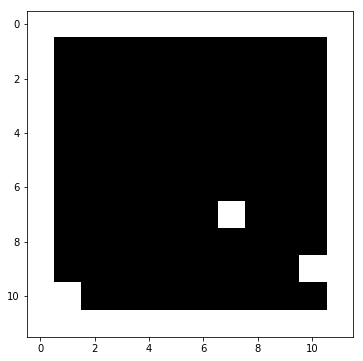

4
[[0 0 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


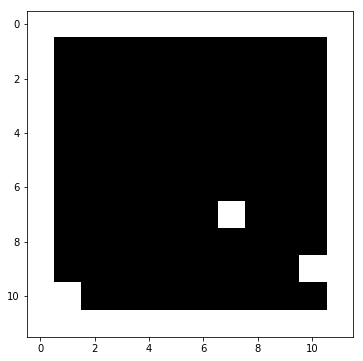

5
[[0 0 1]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


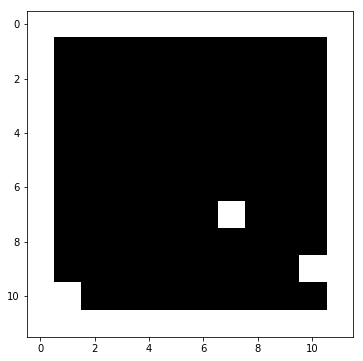

6
[[0 1 1]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


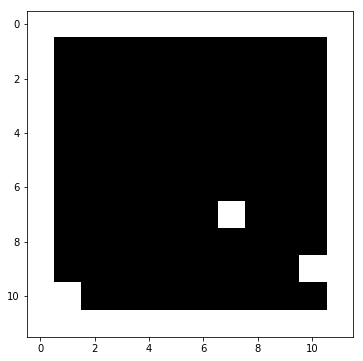

7
[[1 1 1]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


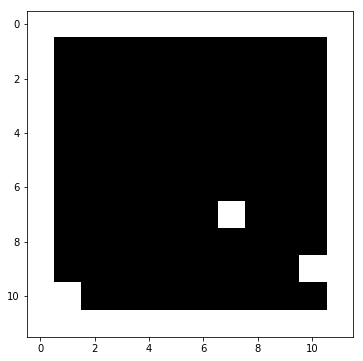

8
[[1 1 0]
 [0 0 0]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


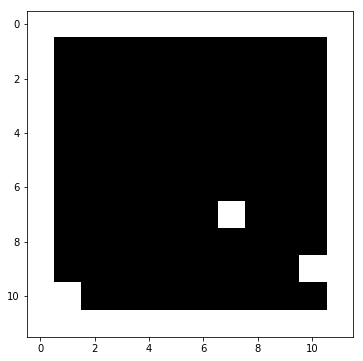

9
[[1 0 0]
 [0 0 1]
 [0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


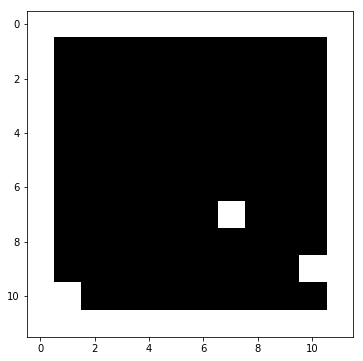

10
[[0 0 1]
 [0 1 1]
 [0 0 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


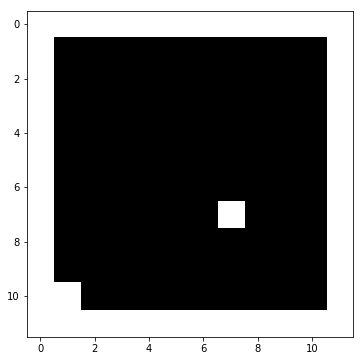

10
1
[[1 0 0]
 [1 1 0]
 [1 1 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


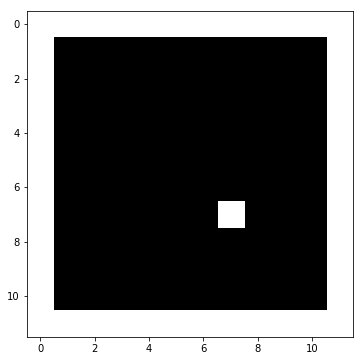

2
[[0 0 0]
 [1 0 0]
 [1 1 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


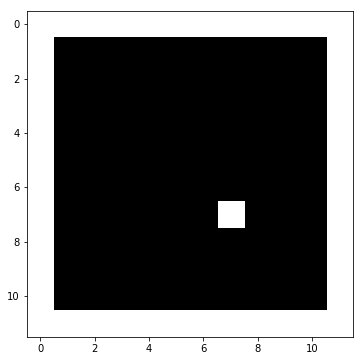

3
[[0 0 0]
 [0 0 0]
 [1 1 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


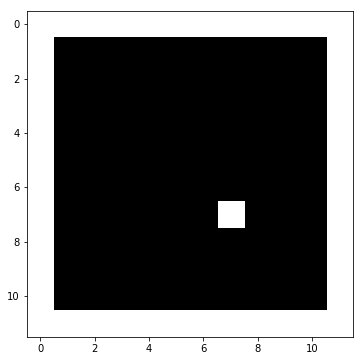

4
[[0 0 0]
 [0 0 0]
 [1 1 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


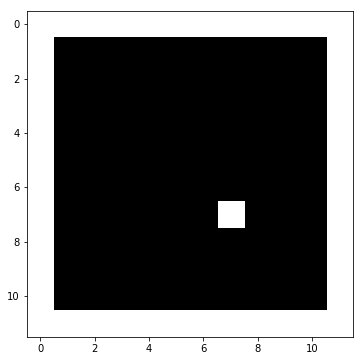

5
[[0 0 0]
 [0 0 0]
 [1 1 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


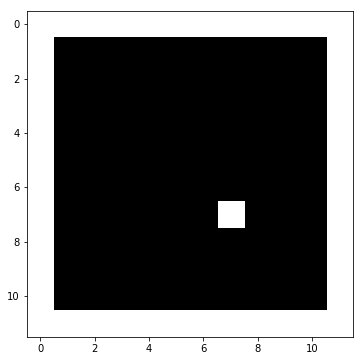

6
[[0 0 0]
 [0 0 0]
 [1 1 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


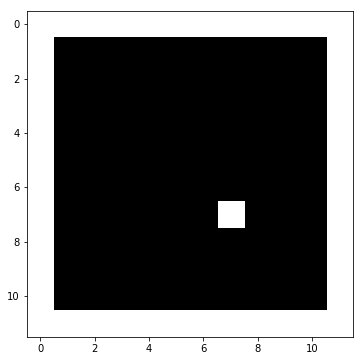

7
[[0 0 0]
 [0 0 0]
 [1 1 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


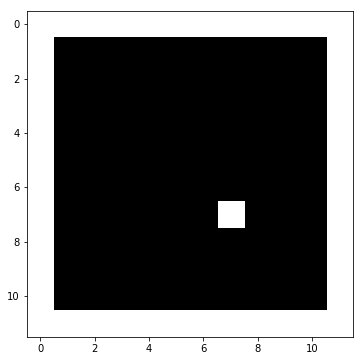

8
[[0 0 0]
 [0 0 0]
 [1 1 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


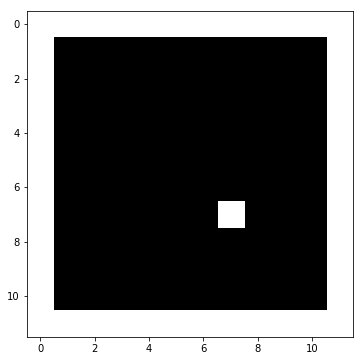

9
[[0 0 1]
 [0 0 0]
 [1 1 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


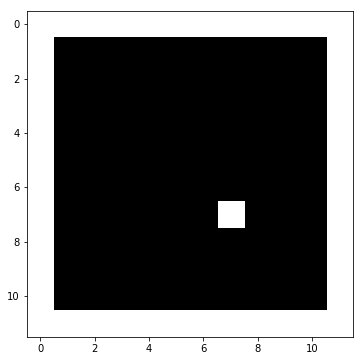

10
[[0 1 1]
 [0 0 1]
 [1 1 1]]
[[1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1]]


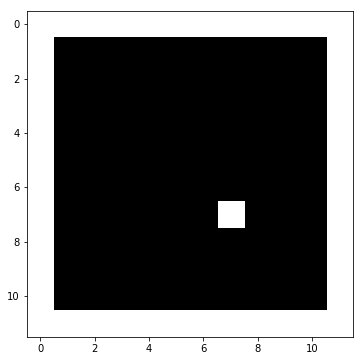

In [98]:
border = ksize//2
paddedIm = np.zeros((height + border*2, width + border*2))
paddedIm = cv2.copyMakeBorder(im, border, border, border, border, cv2.BORDER_CONSTANT, value = 1)
paddedErodedIm = paddedIm.copy()
# Create a VideoWriter object
# Use frame size as 50x50
out = cv2.VideoWriter('erosionScratch.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (50,50))
print(element)
print(paddedIm)
for h_i in range(border, height+border):
    print(h_i)
    for w_i in range(border,width+border):
        print(w_i)
        print(paddedIm[h_i-1 : h_i+2, w_i-1 : w_i+2])
        resultIm = cv2.bitwise_and(paddedIm[h_i-1 : h_i+2, w_i-1 : w_i+2], element)
        #print(resultIm)  
        maxCol = np.amin(resultIm[:,1])
        maxRow = np.amin(resultIm[1,:])
        maxResult = min(maxRow, maxCol)
        #print(maxCol)
        #print(maxRow)
        #print(maxResult)
        #print(paddedIm)
        #print("middle " + str(h_i-1 + 2) + "," + str(w_i-1 + 2) + "=" + str(paddedIm[h_i-1+2, w_i-1+2]))
        paddedErodedIm[h_i, w_i] = maxResult
        resizedIm = cv2.resize(paddedErodedIm[border:border+height,border:border+width], (50, 50), interpolation = cv2.INTER_AREA)
        resizedImBGR = cv2.cvtColor(resizedIm*255, cv2.COLOR_GRAY2BGR)
        out.write(resizedImBGR)
        print(paddedErodedIm)
        plt.imshow(paddedErodedIm);plt.show()
        
# Release the VideoWriter object
out.release()


In [99]:
%%HTML
<video width="320" height="240" controls>
  <source src="erosionScratch.avi" type="video/mp4">
</video>

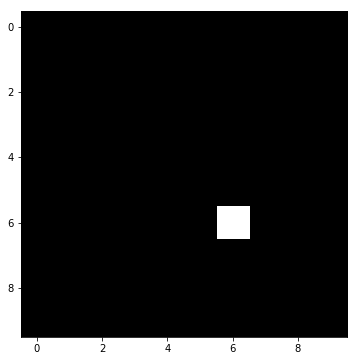

In [100]:
# Display final image (cropped)
erodedImage = paddedErodedIm[border:border+height,border:border+width]
plt.imshow(erodedImage)

